# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 2. Data Inspection

In [2]:
# load the data
df = pd.read_csv('diabetes_data.csv')

# inspect the top few rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Age** is the only numerical variable in the dataset

In [3]:
# rename columns for consistency
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
# get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

- The data contains 520 rows and 17 columns
- There are no missing values

In [5]:
# check a detailed summary of the numerical attribute
df.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


- The youngest respondent in the dataset is **16 years** of age while the oldest is **90 years old**
- The average age of the respondents is **47.5 years**

# 3. Exploratory Data Analysis

### Diabetic Class

What percentage of the cases in the dataset is diabetic?

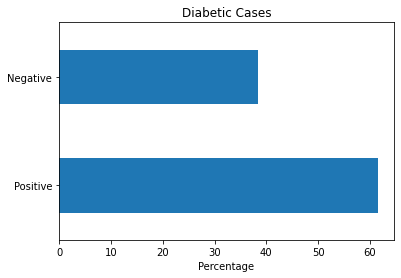

In [6]:
(df['class'].value_counts(normalize=True)*100).plot.barh()
plt.title('Diabetic Cases')
plt.xlabel('Percentage');

More than **60 percent** of the respondents were diabetic

In [7]:
# create a dataframe for positive cases
positive = df[df['class']=='Positive']

### Age

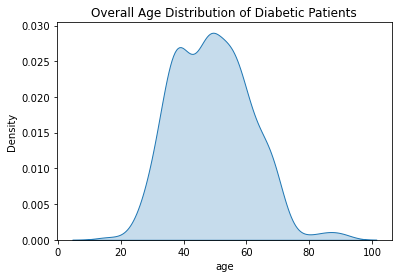

In [8]:
sns.kdeplot(positive.age,shade=True)
plt.title('Overall Age Distribution of Diabetic Patients');

The age variable is almost normally distributed with most diabetic patients aged between **40 and 60 years**

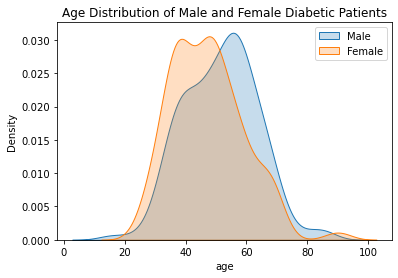

In [9]:
sns.kdeplot(positive[positive.gender=='Male'].age,label='Male',shade=True)
sns.kdeplot(positive[positive.gender=='Female'].age,label='Female',shade=True)
plt.legend()
plt.title('Age Distribution of Male and Female Diabetic Patients');

Diabetes is prevalent among young women and old men. The disease is more common among **women** around ages **30 to 50** and **men** around ages **50 to 70**

### Gender

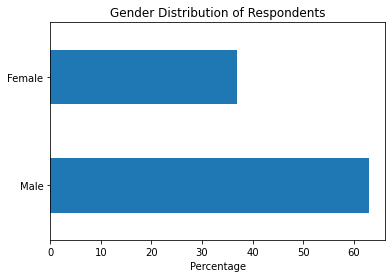

In [10]:
gender = df.gender.value_counts(normalize=True)*100
gender.plot.barh()
plt.title('Gender Distribution of Respondents')
plt.xlabel('Percentage');

Over **60 percent** of the respondents were **boys and/or men**

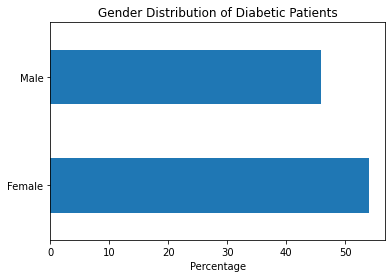

In [11]:
gender = positive.gender.value_counts(normalize=True)*100
gender.plot.barh()
plt.title('Gender Distribution of Diabetic Patients')
plt.xlabel('Percentage');

Over **50 percent** of the diabetic patients were **girls and/or women**. There are more male respondents in the dataset but female respondents make up most of the diabetic cases  

What percentage of the female respondents does this account for?

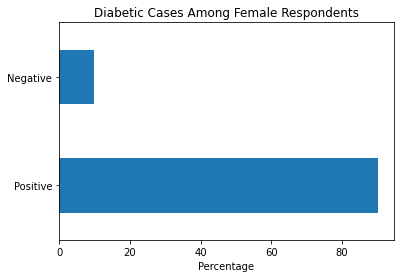

In [12]:
female = df[df.gender=='Female']['class'].value_counts(normalize=True)*100
female.plot.barh()
plt.title('Diabetic Cases Among Female Respondents')
plt.xlabel('Percentage');

Over **80 percent** of the **female respondents** had diabetis

### Sudden Weight Loss

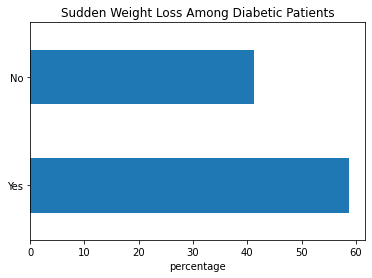

In [13]:
weight_loss = positive['sudden_weight_loss'].value_counts(normalize=True)*100
weight_loss.plot.barh()
plt.title('Sudden Weight Loss Among Diabetic Patients')
plt.xlabel('percentage');

About **60 percent** of the diabetic patients experienced sudden weight loss.

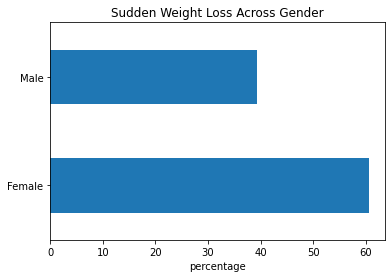

In [14]:
(positive[positive.sudden_weight_loss=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Sudden Weight Loss Across Gender');

About **60 percent** of the diabetic patients who experienced sudden weight loss were female patients. This could be because we have more female diabetic cases

Let's see if weight loss was more common in a particular gender group

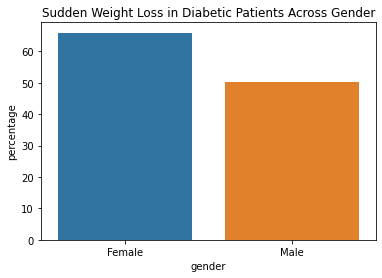

In [15]:
weight_loss = pd.crosstab(index=positive.gender,columns=positive['sudden_weight_loss']).reset_index()
weight_loss['percent_loss'] = weight_loss.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_loss',data=weight_loss)
plt.title('Sudden Weight Loss in Diabetic Patients Across Gender')
plt.ylabel('percentage');

Almost **half** of the male diabetic patients and over **60 percent** of the female diabetic patients experienced sudden weight loss

### Weakness

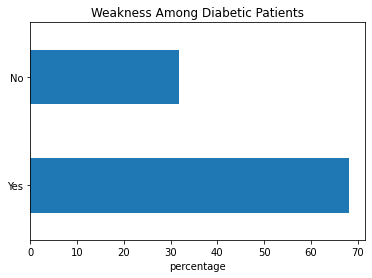

In [16]:
weakness = positive['weakness'].value_counts(normalize=True)*100
weakness.plot.barh()
plt.title('Weakness Among Diabetic Patients')
plt.xlabel('percentage');

About **70 percent** of the diabetic patients experienced weakness.

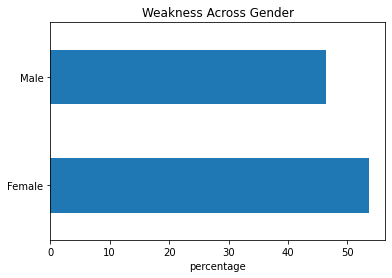

In [17]:
(positive[positive.weakness=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Weakness Across Gender');

Over **50 percent** of the diabetic patients who experienced weakness were female patients.

Let's see if weakness was more common in a particular gender group

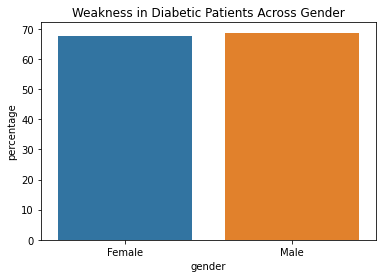

In [18]:
weakness = pd.crosstab(index=positive.gender,columns=positive['weakness']).reset_index()
weakness['percent_weakness'] = weakness.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_weakness',data=weakness)
plt.title('Weakness in Diabetic Patients Across Gender')
plt.ylabel('percentage');

A large percentage of the diabetic patients in both groups experienced weakness

### Genital Thrush

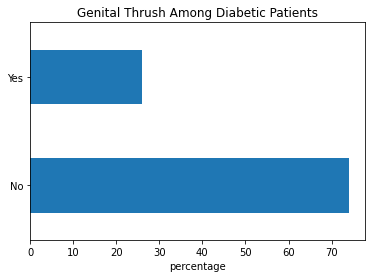

In [19]:
thrush = positive['genital_thrush'].value_counts(normalize=True)*100
thrush.plot.barh()
plt.title('Genital Thrush Among Diabetic Patients')
plt.xlabel('percentage');

About **30 percent** of the diabetic patients experienced genital thrush.

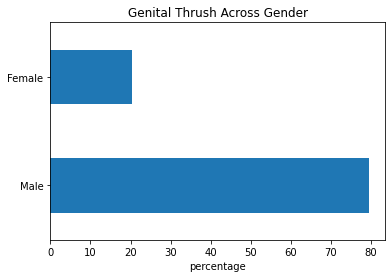

In [20]:
(positive[positive.genital_thrush=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Genital Thrush Across Gender');

A disproportionately high percentage of diabetic patients who experienced genital thrush were male patients.

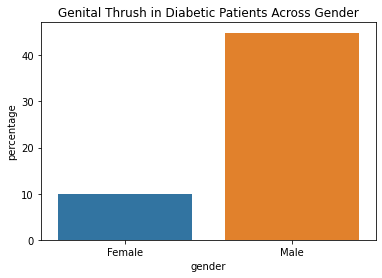

In [21]:
thrush = pd.crosstab(index=positive.gender,columns=positive['genital_thrush']).reset_index()
thrush['percent_thrush'] = thrush.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_thrush',data=thrush)
plt.title('Genital Thrush in Diabetic Patients Across Gender')
plt.ylabel('percentage');

When compared to the female group, a large percentage of the male diabetic patients experienced  genital thrush

### Visual Blurring

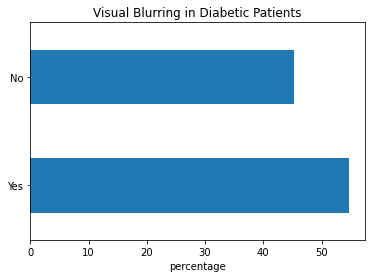

In [22]:
blurring = positive['visual_blurring'].value_counts(normalize=True)*100
blurring.plot.barh()
plt.title('Visual Blurring in Diabetic Patients')
plt.xlabel('percentage');

Over **50 percent** of the diabetic patients experienced blurry vision.

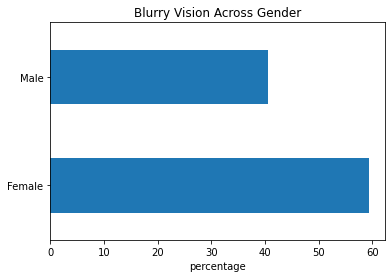

In [23]:
(positive[positive.visual_blurring=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Blurry Vision Across Gender');

About **60 percent** of the diabetic patients who experienced blurry vision were female patients.

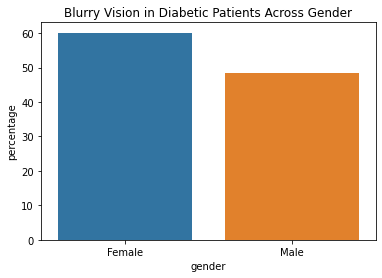

In [24]:
blurring = pd.crosstab(index=positive.gender,columns=positive['visual_blurring']).reset_index()
blurring['percent_blurring'] = blurring.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_blurring',data=blurring)
plt.title('Blurry Vision in Diabetic Patients Across Gender')
plt.ylabel('percentage');

Almost **half** of the male diabetic patients and about **60 percent** of the female diabetic patients experienced blurry vision

### Itching

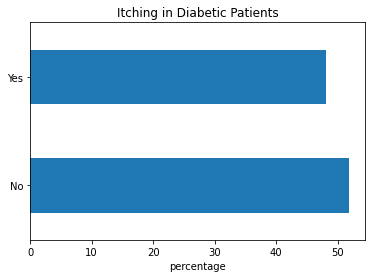

In [25]:
itching = positive['itching'].value_counts(normalize=True)*100
itching.plot.barh()
plt.title('Itching in Diabetic Patients')
plt.xlabel('percentage');

About **50 percent** of the diabetic patients experienced itching.

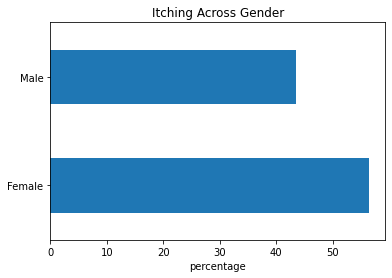

In [26]:
(positive[positive.itching=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Itching Across Gender');

Over **50 percent** of the diabetic patients who experienced itching were female patients.

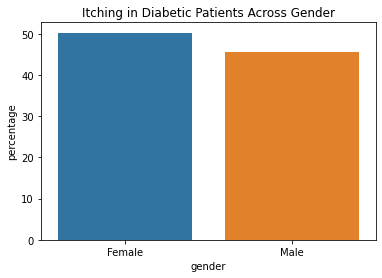

In [27]:
itching = pd.crosstab(index=positive.gender,columns=positive['itching']).reset_index()
itching['percent_itching'] = itching.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_itching',data=itching)
plt.title('Itching in Diabetic Patients Across Gender')
plt.ylabel('percentage');

About half of the diabetic patients in both groups experienced itchness

### Delayed Healing

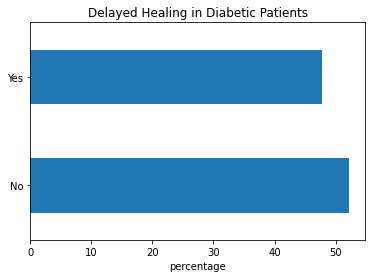

In [28]:
healing = positive['delayed_healing'].value_counts(normalize=True)*100
healing.plot.barh()
plt.title('Delayed Healing in Diabetic Patients')
plt.xlabel('percentage');

Over **50 percent** of the diabetic patients experienced delayed healing.

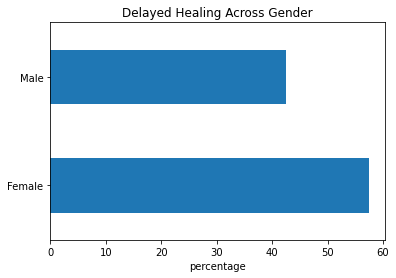

In [29]:
(positive[positive.delayed_healing=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Delayed Healing Across Gender');

About **60 percent** of the diabetic patients who experienced delayed healing were female patients.

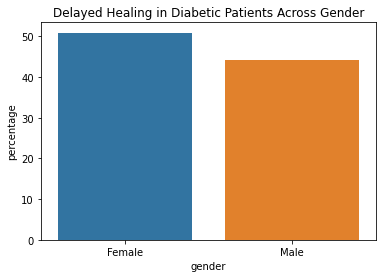

In [30]:
healing = pd.crosstab(index=positive.gender,columns=positive['delayed_healing']).reset_index()
healing['percent_healing'] = healing.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_healing',data=healing)
plt.title('Delayed Healing in Diabetic Patients Across Gender')
plt.ylabel('percentage');

About **half** of the male diabetic patients and over **50 percent** of the female diabetic patients experienced delayed healing

### Obesity

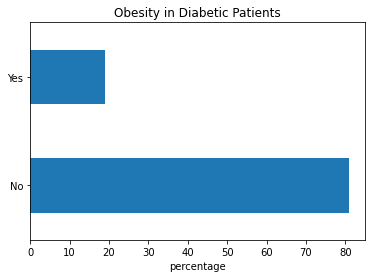

In [31]:
obesity = positive['obesity'].value_counts(normalize=True)*100
obesity.plot.barh()
plt.xlabel('percentage')
plt.title('Obesity in Diabetic Patients');

About **20 percent** of the diabetic patients were obese.

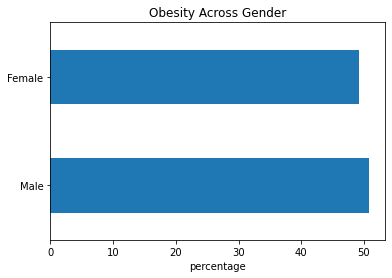

In [32]:
(positive[positive.obesity=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Obesity Across Gender');

Over **50 percent** of the obese diabetic patients were male patients.

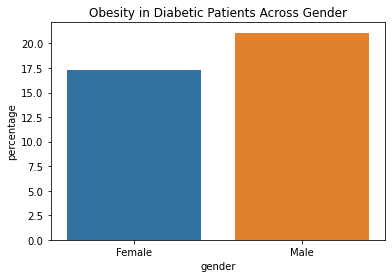

In [33]:
obese = pd.crosstab(index=positive.gender,columns=positive['obesity']).reset_index()
obese['percent_obese'] = obese.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_obese',data=obese)
plt.title('Obesity in Diabetic Patients Across Gender')
plt.ylabel('percentage');

A small percentage of the diabetic patients in both groups were obese

# 4. Data Preprocessing

In [34]:
from sklearn.base import BaseEstimator,TransformerMixin

In [35]:
class Encoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        df = X.copy()
        df.replace(['Yes','Positive','Male','No','Negative','Female'],[1,1,1,0,0,0],inplace=True)
        return df

# 5. Model Building and Evaluation

In [36]:
from sklearn.model_selection import KFold
# import some models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# import evaluation functions
from sklearn.metrics import confusion_matrix

In [37]:
# create a list of models
models = [LogisticRegression(),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          ExtraTreesClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42,verbosity=0),
          LGBMClassifier(random_state=42),
          CatBoostClassifier(random_state=42,verbose=0)
         ]

In [ ]:
preprocessed = Encoder().fit_transform(df)
X = preprocessed.drop('class',axis=1)
y = preprocessed['class']
cv = KFold(n_splits=5,shuffle=True,random_state=42)
confusion_matrices = {model.__class__.__name__:np.array([[0,0],[0,0]]) for model in models}
for model in models:
    for train_index,test_index in cv.split(df):
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        confusion_matrices[model.__class__.__name__]+=confusion_matrix(y_test,preds)

In [ ]:
results = pd.DataFrame()
results['Model'] = list(confusion_matrices.keys())
results[['TN','FP','FN','TP']] = [matrix.ravel() for matrix in list(confusion_matrices.values())]
results['Recall'] = results.TP*100/(results.TP+results.FN)
results['TN Rate'] = results.TN*100/(results.TN+results.FP)
results

The Extra Trees Classifier correctly classifies **98.75 percent** of the diabetic cases while Random Forest and LGBM classifier correctly classify **98 percent** of the non diabetic cases in the dataset.

A model that detects as many diabetic cases as possible should be of interest to us. As a result, recall should be employed to select a preferred model.

In [ ]:
et = ExtraTreesClassifier(random_state=42)
et.fit(X,y)
importances = pd.DataFrame(sorted(zip(et.feature_importances_,X.columns),reverse=True),
                           columns=['importance','attribute'])

plt.figure(figsize=(8,6))
sns.barplot(data=importances,x='importance',y='attribute')
plt.title('Symptoms of Diabetes');

Polyuria and Polydipsia are strong predictors of diabetes. WebMD (2021) defines **Polyuria** as a condition of peeing more than normal.

**Polydipsia**, on the other hand, is a medical term meaning excessive thirst. It is frequently associated with Polyuria because the body feels a persistent urge to replenish the fluids lost during urine. (Healthline, 2021)

### Polyuria

In [ ]:
polyuria = positive['polyuria'].value_counts(normalize=True)*100
polyuria.plot.barh()
plt.xlabel('percentage')
plt.title('Polyuria in Diabetic Patients');

Over **70 percent** of the diabetic patients had polyuria.

In [ ]:
(positive[positive.polyuria=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Polyuria Across Gender');

Over **50 percent** of the diabetic patients who had polyuria were female patients.

In [ ]:
polyuria = pd.crosstab(index=positive.gender,columns=positive['polyuria']).reset_index()
polyuria['percent_polyuria'] = polyuria.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_polyuria',data=polyuria)
plt.title('Obesity in Diabetic Patients Across Gender')
plt.ylabel('percentage');

A significant percentage of the diabetic patients in both groups had polyuria

### Polydipsia

In [ ]:
polydipsia = positive['polydipsia'].value_counts(normalize=True)*100
polydipsia.plot.barh()
plt.xlabel('percentage')
plt.title('Polydipsia in Diabetic Patients');

About **70 percent** of the diabetic patients had polydipsia.

In [ ]:
(positive[positive.polydipsia=='Yes'].gender.value_counts(normalize=True)*100).plot.barh()
plt.xlabel('percentage')
plt.title('Polydipsia Across Gender');

Over **50 percent** of the diabetic patients who had polydipsia were female patients.

In [ ]:
polydipsia = pd.crosstab(index=positive.gender,columns=positive['polydipsia']).reset_index()
polydipsia['percent_polydipsia'] = polydipsia.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_polydipsia',data=polydipsia)
plt.title('Polydipsia in Diabetic Patients Across Gender')
plt.ylabel('percentage');

A significant percentage of the diabetic patients in both groups had polydipsia

# 6. Pickle Final Model

Let's make and pickle a full pipeline for our diabetes prediction tool. This eliminates the need to train our model whenever we need to make a prediction

In [ ]:
# import the pickle library
import pickle
from sklearn.pipeline import Pipeline
import os

# define pipeline
full_pipeline = Pipeline([('preprocessor',Encoder()),
                          ('model',ExtraTreesClassifier(random_state=42))])

# seperate features from target
X = df.drop('class',axis=1)
y = df['class']

# train the pipeline
full_pipeline.fit(X,y)

# pickle the pipeline
if 'model.pkl' in os.listdir():
    print('pickled model exists')
    pass
else:
    pickle.dump(full_pipeline,open('model.pkl','wb'))
    print('model pickled successfully')

In [ ]:
# load pickled model
model = pickle.load(open('model.pkl','rb'))

In [ ]:
# create a set of features
feats = pd.DataFrame([[30,'Male','Yes','Yes','No','Yes','No','Yes',
                       'Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']])

# predict the diabetes class for the given features
model.predict(feats)[0]